In [2]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('HR_comma_sep_updated.csv')

In [5]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [6]:
df.left.value_counts()

left
0    11428
1     8571
Name: count, dtype: int64

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
df.rename(columns={'Department':'departments'},inplace=True)

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [10]:
df.shape

(19999, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     19999 non-null  float64
 1   last_evaluation        19999 non-null  float64
 2   number_project         19999 non-null  int64  
 3   average_montly_hours   19999 non-null  int64  
 4   time_spend_company     19999 non-null  int64  
 5   Work_accident          19999 non-null  int64  
 6   left                   19999 non-null  int64  
 7   promotion_last_5years  19999 non-null  int64  
 8   departments            19999 non-null  object 
 9   salary                 19999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.5+ MB


In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,0.584983,0.664133,3.981999,200.685734,4.117256,0.235512,0.428571,0.139757
std,0.264016,0.226219,1.396270,52.036023,2.101367,0.424329,0.494884,0.346743
min,0.000043,0.000296,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.400000,0.520000,3.000000,155.000000,3.000000,0.000000,0.000000,0.000000
50%,0.611083,0.680000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.804716,0.850000,5.000000,246.000000,5.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
df['salary'].value_counts()

salary
low       8981
medium    8124
high      2894
Name: count, dtype: int64

In [14]:
df['departments'].value_counts()

departments
sales          4595
technical      3181
support        2743
IT             1726
product_mng    1428
marketing      1328
accounting     1314
RandD          1314
hr             1233
management     1137
Name: count, dtype: int64

In [15]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [16]:
df.duplicated().any()

True

In [17]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
df=df.drop_duplicates()

In [19]:
df.shape

(16991, 10)

In [20]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [21]:
# Filter the dataset where 'left' is 1 (employees who left)
left_df = df[df['left'] == 1]

# Group by 'Department' and count the number of employees who left in each department
department_left_count = left_df.groupby('departments').size().reset_index(name='left_count')

department_left_count


,departments,left_count
0,IT,657
1,RandD,612
2,accounting,656
3,hr,607
4,management,559
5,marketing,582
6,product_mng,636
7,sales,1005
8,support,826
9,technical,851


In [22]:
left_df = df[df['left'] == 0]

# Group by 'Department' and count the number of employees who left in each department
department_left_count = left_df.groupby('departments').size().reset_index(name='left_count')

department_left_count


,departments,left_count
0,IT,818
1,RandD,609
2,accounting,512
3,hr,488
4,management,384
5,marketing,561
6,product_mng,576
7,sales,2689
8,support,1509
9,technical,1854


<Axes: xlabel='left'>

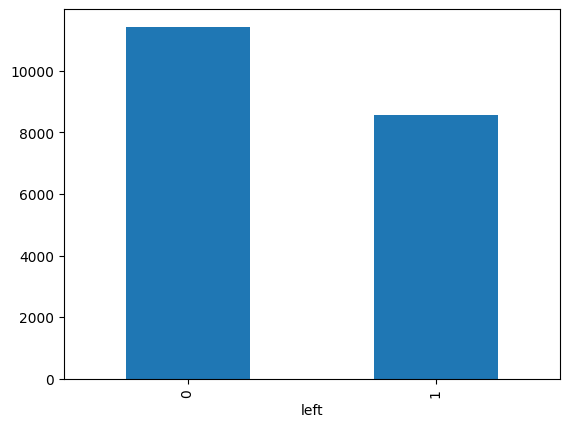

In [13]:
df.left.value_counts().plot(kind='bar')

In [83]:
x=df.drop(columns=['left'])
y=df['left']

In [84]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19994    1
19995    1
19996    1
19997    1
19998    1
Name: left, Length: 16991, dtype: int64

In [85]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [86]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())
    
])

In [87]:
from sklearn import set_config

In [88]:
set_config(display='diagram')

In [89]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [90]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [91]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [92]:
y_pred = pipeline.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred)

0.7969991173874669

In [94]:
def model_scorer(model_name,model):
    
    output=[]
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(accuracy_score(y_test,y_pred))
    
    output.append(precision_score(y_test,y_pred))
    
    output.append(recall_score(y_test,y_pred))
    
    return output

In [95]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
    
}

In [97]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [37]:
model_output

[['log', 0.798645863997645, 0.8102697998259356, 0.6664280601288475],
 ['decision_tree', 0.9057992346187813, 0.8742182070882557, 0.9005010737294202],
 ['random_forest', 0.9378863703267589, 0.9412202380952381, 0.905511811023622],
 ['XGB', 0.9437739181630851, 0.9440353460972017, 0.917680744452398]]

In [98]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [99]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
    
])

In [100]:
pipeline.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [101]:
import pickle

In [102]:
with open('pipeline1.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [103]:
with open('pipeline1.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [68]:
if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

NameError: name 'result' is not defined